<a href="https://colab.research.google.com/github/koegelch/navigation2/blob/main/ML4Eng_II_Exercise_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine Learning Optimizers**

## **Table of contents:**

* ###  1. Introduction
* ###  2. Libraries
* ###  3. Rosenbrock function and optimizers
* ###  4. Settings and path creation
* ###  5. Visualization





## **1. Introduction**

#### **1.1 Motivation**


Within this exercise we want to compare various optimization algorithms for  Neural Networks regarding their performance. To test and compare the performance of different optimizers as well as different settings, we will  use the Rosenbrock function, which is a non-convex function. Our goal is to learn about different types of optimizers and how they work. 

The optimizers we will get to know, are the following:

*   Gradient Descent
*   Momentum
*   Nesterov
*   Adam

For better comprehension, the operation of the optimizers is shown graphically in this notebook. A large part of the code is just used for visualization.  Therefore it is not necessary to understand these code parts completely. Sometimes the illustrations are not visualized correctly, in this case a restart of the runtime often helps.

#### **1.2 Deliverables**
For completing this exercise successfully, you need to deliver certain results. Throughout the notebook you will find **questions** you need to answer, and coding **tasks** where you need to modify existing code or fill in blanks. Answers to the questions need to be added in the prepared *Your answer here* markdown fields. Coding tasks can be solved by modifying or inserting code in the cells below the task. If needed, you can add extra cells to the notebook, as long as the order of the existing cells remains unchanged.

Example:

>**Question:** What do I do if I am stuck solving this lab?

>**Your answer:** <span style="color:green"> Have a look at the forum, maybe some of your peers already experienced similiar issues. Otherwise start a new discussion to get help!</span>

>**Solution:** <span style="color:black">The correct solution for the question</span>

When you are done with the tasks, we would like to encourage you to perform further tests with the notebook with different parameters, etc.

#### **1.3 Resources**
If you are having issues while completing this lab, feel free to post your questions into the forum. Your peers as well as our teaching advisors will screen the forum regularly and answer open questions. This way, the information is available for fellow students encountering the same issues.

Note: Here we also want to promote the work with online resources and thus the independent solution of problems. For some tasks you have to "google" for the appropriate method yourself. For other tasks the already given code must be adapted or just copied.

## **2. Import of necessary modules and libraries**

First, we have to load the necessary libraries.



In [ ]:
!pip install ipympl
%matplotlib widget

     |████████████████████████████████| 84 kB 3.5 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from itertools import zip_longest


**2.1 Defining the class for the animation of our different optimizers**

After the import of the necessary libraries we create the code for the animation of the performance for our different optimizers. We need that for the visualization of the trajectories of the respective optimizer functions we use.

In [ ]:
# Animation class
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

## **3 Defining the  Rosenbrock function and the different optimizers**

The Rosenbrock function is used as a performance test problem for optimization algorithms. 
It has a global minimum at <a href="https://www.codecogs.com/eqnedit.php?latex=(x,y)&space;=&space;(a,&space;a^2)" target="_blank"><img src="https://latex.codecogs.com/svg.latex?(x,y)&space;=&space;(a,&space;a^2)" title="(x,y) = (a, a^2)" /></a>

Further information can be found here: 
[Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function) 



## **Optimizers**

The optimizers have been discussed in the lecture. However, for additional information you can click on the following link: [Optimization Algorithms](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6)

> **Question:** What are optimizers and what can they be used for?

> **My answer:** TBD

**Rosenbrock Function**

Following, we define the Rosenbrock function and set its parameters.

In [ ]:
a_f = 1
b_f = 2

f = lambda x,y: (a_f-x)**2 + b_f * (y-x**2)**2

For the further processing we use Autograd's grad function and define the following function for easier use with autograd. Have a look at the documentation of the grad function.

In [ ]:
from autograd import grad

In [ ]:
# this function is for easier use with autograd
def f_ad(point):
    x,y = point
    return f(x,y)

In [ ]:
# grad_f is the gradient of f
grad_f = grad(f_ad)

**Optimizers**

Following, we define the different optimizers.

**Gradient** **Descent**

In [ ]:
def gd(sp,a):
    # sp starting point
    # a learning rate
    return sp - a*grad_f(sp)

# functions which iteratively call the optimization algorithms to create a path
def create_path_gd(sp, a, nit=10):
    #sp starting point
    # a learning rate
    #nit number of iterations
    path = np.tile(sp,(nit+1,1))
    for i in range(nit):
        path[i+1] = gd(path[i],a)
    return path


**Momentum**

In [ ]:
def momentum(sp, a, v, b):    
    # sp starting point
    # a learning rate
    # v velocity
    # b momentum decay
    g = grad_f(sp)
    v = b * v - a * g
    sp = sp + v
    return sp, v

# functions which iteratively call the optimization algorithms to create a path

def create_path_momentum(sp, a, b, nit=10):
    #sp starting point
    # a learning rate
    #nit number of iterations
    path = np.tile(sp,(nit+1,1))
    v = np.array(0 * sp)
    for i in range(nit):
        path[i+1], v = momentum(path[i],a,v,b)
    return path


**Nestorov**

In [ ]:
def nesterov(sp, a, v, b):    
    # sp starting point
    # a learning rate
    # v velocity
    # b momentum decay
    sp_f = sp +  b * v
    g = grad_f(sp_f)
    v = b * v - a * g
    sp = sp + v
    return sp, v

# functions which iteratively call the optimization algorithms to create a path
def create_path_nesterov(sp, a, b, nit=10):
    #sp starting point
    # a learning rate
    #nit number of iterations
    path = np.tile(sp,(nit+1,1))
    v = np.array(0 * sp)
    for i in range(nit):
        path[i+1], v = nesterov(path[i],a,v,b)
    return path

**Adam**

In [ ]:
# same as above only for adam
def adam_inner(sp, s, r, t, a=0.001):
    rho1=0.9 
    rho2=0.999
    # sp starting point
    # rho_i exponential decay rates
    # a learning rate
    # s first moment estimate
    # r uncentered second moment estimate
    delta = 1e-8
    
    t += 1
    g = grad_f(sp)
    
    s = rho1 * s + (1 - rho1) * g
    r = rho2 * r + (1 - rho2) * np.square(g)
    
    s_hat = s / ( 1 - rho1 ** t )
    r_hat = r / ( 1 - rho2 ** t )
    
    delta_sp =  a * s_hat / ( np.sqrt(r_hat) + delta )
    
#  print("delta_sp", delta_sp)
    sp = sp - delta_sp
    return sp, s, r, t  

def create_path_adam(sp, a, nit=10):
    # sp starting point
    # rho_i exponential decay rates
    # a learning rate suggested 0.001
    # s first moment estimate
    # r uncentered second moment estimate
    path = np.tile(sp,(nit+1,1))
    s = np.random.rand(sp.shape[0])*0.
    r = np.random.rand(sp.shape[0])*0.
    t = 0 
    for i in range(nit):
        path[i+1], s, r, t  = adam_inner(path[i], s, r, t, a = a)
    return path

## **4. Settings and path creation**

In the next step, the learning rate, the hyperparameters used in momentum and nesterov and the number of iterations are defined.

>**Question:** What impact does the learning rate have on the perfomance of Neural Networks? What effects can be described when the learning rate is defined too small or too large? 

>**Your answer:**  TBD

In [ ]:
# a is the learning rate
a = 0.02

# b is the second hyperparameter used in momentum and nesterov
b = 0.8

# number of iterations e.g. number of points in path
it = 500

# individual learning rates for the algorithm in case someone wants to try different values
a_gd = a/1.
a_mom = a/1.
a_nest = a/1.
a_adam = 2e-1

# starting point
x0 = np.array([3.,3.])

Next, last implementations for the visualisation are made.

In [ ]:
# create the paths
path_gd = create_path_gd(x0,a,it)
path_mom = create_path_momentum(x0,a,b,it)
path_nest = create_path_nesterov(x0,a,b,it)

path_adam = create_path_adam(x0,a_adam,it)

# for easier use later save all path in a list
paths=[path_gd.T,path_mom.T,path_nest.T,path_adam.T]
# paths
# paths[1][1,-1]

# create the function values of the points on each path for plotting
zpaths = [f_ad(path) for path in paths]

# function to create the mesh for plotting
def f_ad_mesh(x,y):
    return  f(x,y) #x**4 + x*y + y**4 +1

# mesh parameters
xmin, xmax, xstep = -5.5, 6.5, .1
ymin, ymax, ystep = -5.5, 13.5, .1

# mesh creation
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = f_ad_mesh(x, y)

## **5. Visualization** 

Following, the Rosenbrock function is visualised and projected in 2D and 3D to show its structure according to the choosen parameters and the minima. Furthermore, we want to envision the different trajectories of the different optimizer functions Gradient Descent, Momentum, Nesterov and Adam in order to better compare and understand how they operate.

In [ ]:
import matplotlib.colors as mcolors

Following a 3D Plot for the Rosenbrock function with the parameters defined above is specified and visualised. The minima is visualised as a red point.

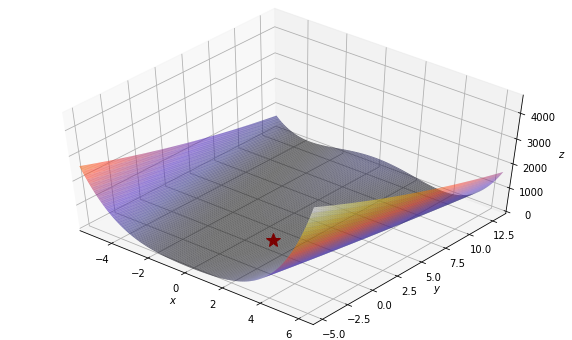

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z+np.abs(np.min(z))+1, rstride=1, cstride=1, #norm=mcolors.LogNorm(),#vmax=2,clip=True),
                edgecolor='none', alpha=.6, cmap=plt.cm.CMRmap)

minima_ = (a_f, a_f**2)
ax.plot([minima_[0]],[minima_[1]], f(*minima_), marker = '*', color='red', markersize=15)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# ax.set_xlim((-1,1))
# ax.set_ylim((-1,1))
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
# ax.set_zlim((-2.0e+4,2.0e+4))
plt.show()


In [ ]:
print('Rosenbrock function parameters:\na_f: ' + str(a_f) + '\nb_f: ' + str(b_f))

Rosenbrock function parameters:
a_f: 1
b_f: 2


Following a 2D Plot for the Rosenbrock function with the parameters defined above is specified and visualised. The minima is visualised as a red point.

(-5.5, 13.5)

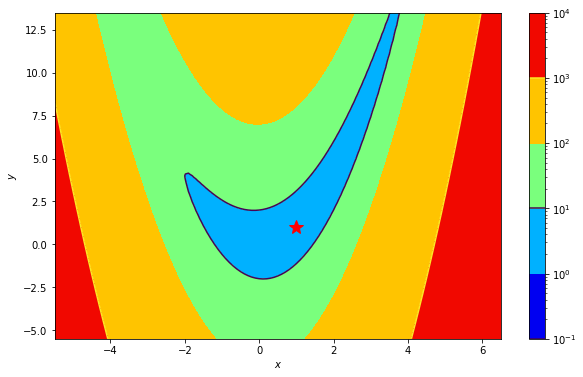

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

CS = ax.contourf(x, y, z+np.abs(np.min(z))+1, levels=20,
           norm=LogNorm(),#mcolors.Normalize(vmax=-10,clip=True),
           cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=15)
CS2 = ax.contour(CS, levels=CS.levels[::2])#, origin=origin)

#plt.scatter(a_f,a_f**2,c="red",marker='*')
cbar = fig.colorbar(CS)
cbar.add_lines(CS2)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))



At the beginning, we defined a class for the animation of our different optimizers. Following, the different optimizer functions and their respective trajectory are envisioned in the 2D plot we defined above.

In [ ]:
anim = TrajectoryAnimation(*paths, labels=["Gradient Descent",'Momentum', 'Nesterov', 'Adam'], ax=ax, interval=25)

ax.legend(loc='lower left')

# plt.show()
# HTML(anim.to_html5_video())

Here we can see the respective optimizers and their paths.

In [ ]:
HTML(anim.to_html5_video())

>**Question:** In the animation above you can see the paths of the different optimization methods. Describe what you see and compare the different paths. 

>**Your answer:** TBD

**Changing the parameters of the Rosenbrock function and re-running of the notebook**

>**Task:** At the beginning of section 3 the parameters of the Rosenbrock function are defined. These are currently given as a =1 and b= 2. Change these parameters and execute the notebook again (set the parameters a and b in the range from -5 to 5).

> Compare what effect the new parameters have on the optimizers. What has changed compared to the given standard setting? Please indicate which parameters you have chosen.

>**Your answer:** TBD
